In [1]:
import numpy as np
import pandas as pd
import os
import mvpa_base_functions as bf
import pickle
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

%matplotlib inline

In [2]:
D = pickle.load(open('./results/threat_circuit_cross_validation_accuracy.pkl', 'rb'))
all_mvals = D['all_mvals']
all_evals = D['all_evals']
all_chance_vals = D['all_chance_vals']

cond_mvals, ext_mvals, recall_mvals = all_mvals[0:4], all_mvals[4:8], all_mvals[8:12]
cond_evals, ext_evals, recall_evals = all_evals[0:4], all_evals[4:8], all_evals[8:12]
cond_rand, ext_rand, recall_rand = all_chance_vals[0:4], all_chance_vals[4:8], all_chance_vals[8:12]

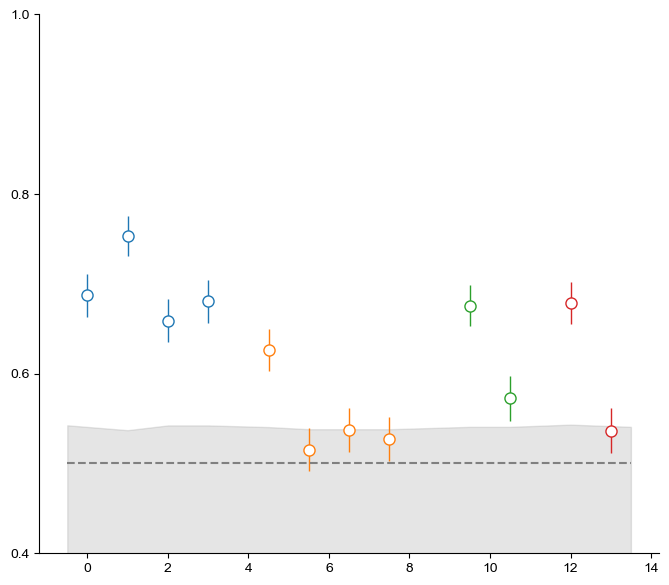

In [3]:
cus_colors = [[221/255,151/255,39/255], [125/255,93/255,150/255], [166/255, 105/255, 111/255], [207/255, 93/255, 30/255]]
line_type = ''

fig, ax = plt.subplots(1,1,figsize=(8, 7))
width = 0.5


x = np.arange(len(cond_mvals))

ax.errorbar(x, cond_mvals, yerr=cond_evals, fmt='o', lw=1, mfc='w', ms=8, linestyle=line_type)
# ax.plot(x, cond_rand1[1], color='gray')

x = len(cond_mvals) + 0.5 + np.arange(len(ext_mvals))
ax.errorbar(x, ext_mvals, yerr=ext_evals, fmt='o', lw=1, mfc='w', ms=8, linestyle=line_type)
# ax.plot(x, ext_rand1[1], color='gray')


x = len(cond_mvals) + 0.5 + len(ext_mvals) + 1. + np.arange(2)
ax.errorbar(x, recall_mvals[:2], yerr=recall_evals[:2], fmt='o', lw=1, mfc='w', ms=8, linestyle=line_type)
# ax.plot(x, recall_rand1[1,:2], color='gray')

x = len(cond_mvals) + 0.5 + len(ext_mvals) + 3.5 + np.arange(2)
ax.errorbar(x, recall_mvals[2:], yerr=recall_evals[2:], fmt='o', lw=1, mfc='w', ms=8, linestyle=line_type)
# ax.plot(x, recall_rand1[1,2:], color='gray')

ax.plot([-0.5,13.5], [0.5,0.5], linestyle='--', color='gray')
ax.set_ylim([0.4,1.0])
ax.set_yticks(np.arange(0.4,1.01,0.2))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.fill_between([-0.5,1,2,3,4.5,5.5,6.5,7.5,9.5,10.5,12,13.5], 0.4, np.concatenate([cond_rand, ext_rand, recall_rand]), alpha=0.2, color='gray');